<a href="https://colab.research.google.com/github/ddiaz1999/Taller2_IA/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [542]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import prettytable
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', None)
import datetime
from plotly.subplots import make_subplots

In [543]:
#/content/drive/My Drive/TALLER 2 IA/dataset
path = '/content/drive/My Drive/TALLER 2 IA/dataset'
for dirname, _, filenames in os.walk(path):
  print(dirname)
  for file in filenames:
    print(os.path.join(path,file))


path_crime = '/content/drive/My Drive/TALLER 2 IA/dataset/crime.csv'

data = pd.read_csv(path_crime,encoding = 'latin')
data.head()

/content/drive/My Drive/TALLER 2 IA/dataset
/content/drive/My Drive/TALLER 2 IA/dataset/crime.csv
/content/drive/My Drive/TALLER 2 IA/dataset/offense_codes.csv


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [544]:
print(data.columns)

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')


In [545]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import folium 
from folium.plugins import HeatMap
from fbprophet import Prophet


data = data.rename(columns={'OFFENSE_CODE':'Code','OFFENSE_CODE_GROUP':'Group','OFFENSE_DESCRIPTION':'Description','OCCURRED_ON_DATE':'Date'})
data.head()
#print(data.shape)

,INCIDENT_NUMBER,Code,Group,Description,DISTRICT,REPORTING_AREA,SHOOTING,Date,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [546]:
data.drop(['INCIDENT_NUMBER','Code','SHOOTING','UCR_PART','Lat','Long','Location'],inplace=True,axis=1)
data.head()

,Group,Description,DISTRICT,REPORTING_AREA,Date,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET
0,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,LINCOLN ST
1,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,HECLA ST
2,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,CAZENOVE ST
3,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,NEWCOMB ST
4,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,DELHI ST


In [547]:
data['Date']=pd.to_datetime(data['Date'])
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Group           319073 non-null  object        
 1   Description     319073 non-null  object        
 2   DISTRICT        317308 non-null  object        
 3   REPORTING_AREA  319073 non-null  object        
 4   Date            319073 non-null  datetime64[ns]
 5   YEAR            319073 non-null  int64         
 6   MONTH           319073 non-null  int64         
 7   DAY_OF_WEEK     319073 non-null  object        
 8   HOUR            319073 non-null  int64         
 9   STREET          308202 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 24.3+ MB


Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18750
Other                              18075
Drug Violation                     16548
Simple Assault                     15826
Vandalism                          15415
Verbal Disputes                    13099
Towed                              11287
Investigate Property               11124
Larceny From Motor Vehicle         10847
Property Lost                       9751
Warrant Arrests                     8407
Aggravated Assault                  7807
Name: Group, dtype: int64


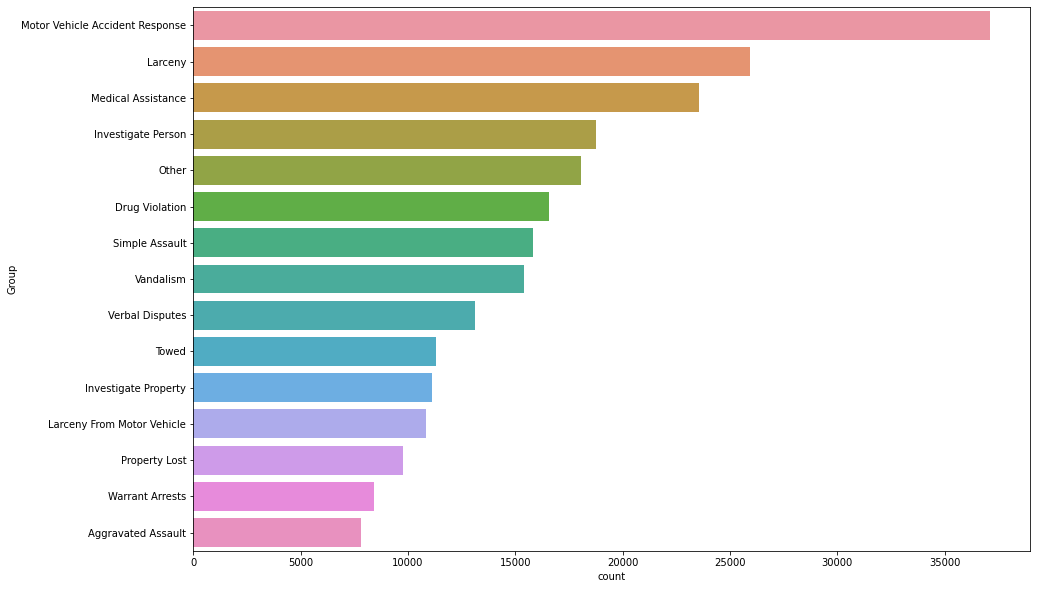

In [548]:
data.index=pd.DatetimeIndex(data.Date)
data.head()
order_data1=data['Group'].value_counts().iloc[:15]
print(order_data1)
order_data=data['Group'].value_counts().iloc[:15].index
plt.figure(figsize=(15,10))
sns.countplot(y='Group',data=data,order=order_data)
plt.ioff()


In [549]:
crimes = data['Group'].value_counts().iloc[:15]

crimes = list(crimes.keys())

data = data.loc[data['Group'].isin(crimes)]

data['Group'] = data['Group'].astype('category')
data = pd.get_dummies(data=data['Group'])

data.head()

,Aggravated Assault,Drug Violation,Investigate Person,Investigate Property,Larceny,Larceny From Motor Vehicle,Medical Assistance,Motor Vehicle Accident Response,Other,Property Lost,Simple Assault,Towed,Vandalism,Verbal Disputes,Warrant Arrests
Date,,,,,,,,,,,,,,,
2018-09-02 13:00:00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2018-08-21 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2018-09-03 19:27:00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2018-09-03 21:16:00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2018-09-03 21:05:00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [550]:
data = data.resample('Y').sum()
data.head()
#print(data)

,Aggravated Assault,Drug Violation,Investigate Person,Investigate Property,Larceny,Larceny From Motor Vehicle,Medical Assistance,Motor Vehicle Accident Response,Other,Property Lost,Simple Assault,Towed,Vandalism,Verbal Disputes,Warrant Arrests
Date,,,,,,,,,,,,,,,
2015-12-31,1386.0,3300.0,2511.0,1269.0,5006.0,2113.0,3139.0,5827.0,3378.0,1525.0,2612.0,1559.0,2701.0,1509.0,1319.0
2016-12-31,2365.0,5284.0,5762.0,3354.0,7902.0,3518.0,6978.0,11534.0,5538.0,2855.0,4740.0,3223.0,5063.0,4099.0,2837.0
2017-12-31,2404.0,4759.0,6659.0,3972.0,7807.0,3189.0,7817.0,12049.0,5323.0,3119.0,4896.0,3951.0,4837.0,4436.0,3098.0
2018-12-31,1652.0,3205.0,3818.0,2529.0,5220.0,2027.0,5606.0,7722.0,3836.0,2252.0,3578.0,2554.0,2814.0,3055.0,1153.0


In [551]:
  X = data.index
  X = np.array(X)
  X = X[:,np.newaxis]
  #print(X)
  print(X.shape)

(4, 1)


In [552]:
y = data['Verbal Disputes']
#print(y)
y.shape

(4,)

In [553]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_samples, n_features = X.shape[0], X.shape[1]
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X, y)
#Pipeline(steps=[('standardscaler', StandardScaler()),
               # ('svr', SVR(epsilon=0.2))])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [554]:
X_test = np.array(pd.date_range(start='10/10/2018', periods=5, freq='2Y'))
X_test = X_test[:,np.newaxis]
print(X_test)
print(X_test.shape)

[['2018-12-31T00:00:00.000000000']
 ['2020-12-31T00:00:00.000000000']
 ['2022-12-31T00:00:00.000000000']
 ['2024-12-31T00:00:00.000000000']
 ['2026-12-31T00:00:00.000000000']]
(5, 1)


In [555]:
Y_predict = regr.predict(X_test)
print(Y_predict)

[3576.26458034 3576.73455802 3576.77442651 3576.77442928 3576.77442928]
